In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from IPython.display import clear_output
from datetime import datetime

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import json
import numpy as np
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate
from sklearn import linear_model
from scipy.stats import multivariate_normal
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
import statsmodels.api as sm




import warnings
warnings.filterwarnings("ignore")

C:\Users\artys\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Часть I: О теореме Байеса
Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.


1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови!

    Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.


Прокурор должен был оценить условную вероятность p(виновен | редкая группа крови), а оценил вероятность редкой группы крови р(редкая группа крови) = 0.01.

По условию р(редкая группа крови | виновен) = 1, тогда 
по теореме Байеса: р(виновен | редкая группа крови) = р(редкая группа крови | виновен) * р(виновен) / р(редкая группа крови) = р(виновен) / р(редкая группа крови)

Прокурор оценил условную вероятность без использования вероятности виновности, хотя данная вероятность присутствует в формуле.

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить?


Адвокат посчитал вероятность выбрать одного человека с редкой группой крови, т.е. он посчитал, что у всех людей с редкой группой крови одинаковая вероятность быть виновными (равномерное распределение), а на самом деле есть другие обстоятельства дела, которые влияют является человек подозреваемым.

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%.

    Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного).

    Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?


In [2]:
def fun_prob(x):
    p_d1 = 0.01
    p_d0 = 1 - p_d1

    p_t0_d1 = x
    p_t1_d1 = 1 - x

    p_t1_d0 = x
    p_t0_d0 = 1 - x

    p_t1 = p_t1_d1 * p_d1 + p_t1_d0 * p_d0
    p_t0 = p_t0_d1 * p_d1 + p_t0_d0 * p_d0

    p_d1_t1 = (p_t1_d1 * p_d1) / p_t1
    p_d1_t0 = (p_t0_d1 * p_d1) / p_t0

    p_d0_t1 = (p_t1_d0 * p_d0) / p_t1
    p_d0_t0 = (p_t0_d0 * p_d0) / p_t0

    return p_d1_t1, p_d1_t0, p_d0_t1, p_d0_t0

In [3]:
x = np.linspace(0, 1, 100)

p_d1_t1, p_d1_t0, p_d0_t1, p_d0_t0 = fun_prob(x)

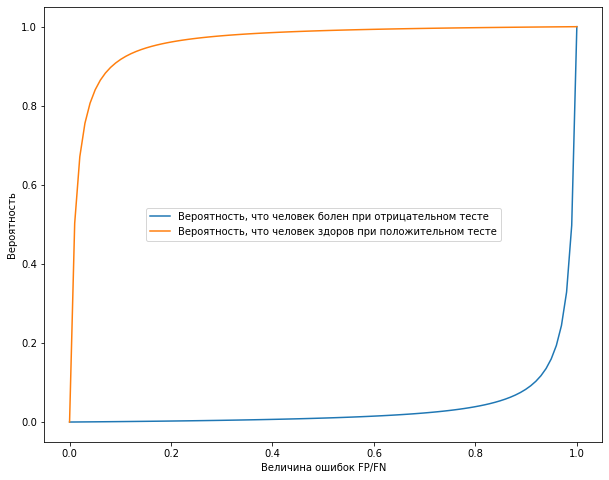

In [4]:
plt.figure(figsize=(10, 8))
plt.plot(x, p_d1_t0, label='Вероятность болезни при отрицательном тесте - зависимость от FN')
plt.plot(x, p_d1_t1, label='Вероятность болезни при положительном тесте - зависимость от FP')
plt.axvline(x=0.05, linestyle = '--', color = 'red')
plt.xlabel('Величина ошибок FP/FN')
plt.ylabel('Вероятность болезни')
plt.legend()
plt.show()

Сейчас вероятность обех ошибок равна 0.05 

При этом вероятность болезни при отрицательном тесте (зависимость от FN) - низкая, что хорошо. И данная вероятность при дальнейшем уменьшении ошибки FN будет меняться незначительно.

С другой стороны вероятность болезни при положительном тесте достаточно высокая (зависимость от FP), что опять же хорошо. Но данная вероятность при дальнейшем уменьшении ошибки FP будет увеличиваться значительно быстрее.

Таким образом, врачам следует сосредоточиться над уменьшением ошибки FP - это принесет больше пользы.

# Часть II: О линейной регрессии
Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:
https://ourworldindata.org/coronavirus-source-data

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

In [5]:
data = pd.read_csv('owid-covid-data.csv')
data = data[(data['iso_code']=='RUS')&(data['date']>='2020-03-03')]
data.loc[data[data['new_cases']==0].index, 'new_cases'] = 1

In [6]:
start_date = pd.to_datetime('2020-03-03')
end_full = pd.to_datetime('2020-09-02')
end_train = start_date + pd.DateOffset(days=50)
end_test = pd.to_datetime('2020-09-01')

In [7]:
full = data[data['date']<str(end_full)[:10]]
train = data[data['date']<str(end_train)[:10]]
test = data[(data['date']>=str(end_train)[:10])&(data['date']<str(end_test)[:10])]

In [8]:
full['date_num'] = np.arange(full.shape[0])
full['ln_new_cases'] = np.log(full['new_cases'])
full['ln_total_cases'] = np.log(full['total_cases'])

train['date_num'] = np.arange(train.shape[0])
train['ln_new_cases'] = np.log(train['new_cases'])
train['ln_total_cases'] = np.log(train['total_cases'])

2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

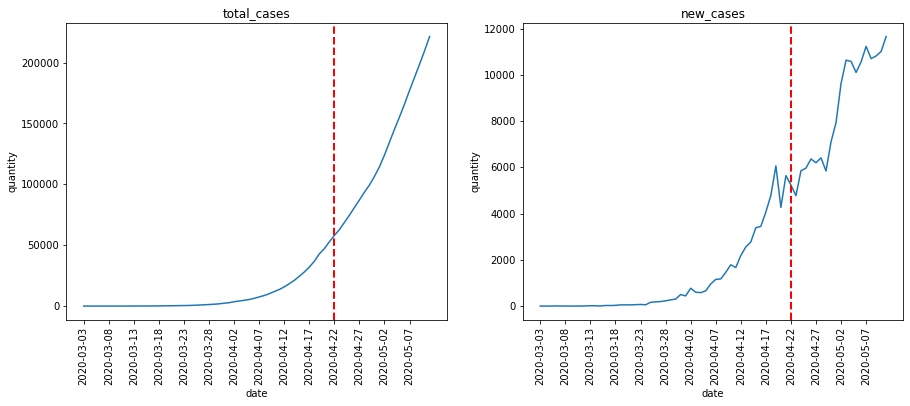

In [9]:
# В обычной шкале 

i = 70

fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.set(title = 'total_cases')
ax_2.set(title = 'new_cases')

ax_1.plot(full['date'][:i], full['total_cases'][:i])
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')

ax_2.plot(full['date'][:i], full['new_cases'][:i])
ax_2.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_2.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_2.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_2.set_xlabel('date')
ax_2.set_ylabel('quantity')

plt.show()

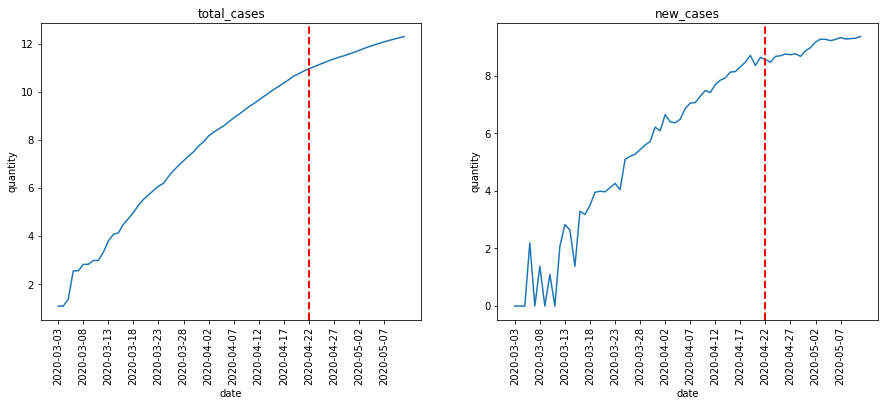

In [10]:
# В логарифмированной шкале

i = 70

fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.set(title = 'total_cases')
ax_2.set(title = 'new_cases')

ax_1.plot(full['date'][:i], full['ln_total_cases'][:i])
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')

ax_2.plot(full['date'][:i], full['ln_new_cases'][:i])
ax_2.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_2.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_2.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_2.set_xlabel('date')
ax_2.set_ylabel('quantity')

plt.show()

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

In [11]:
lr_new_cases = LinearRegression()
lr_total_cases = LinearRegression()

In [12]:
lr_new_cases.fit(train['date_num'].values.reshape(-1, 1), train['ln_new_cases'])
lr_total_cases.fit(train['date_num'].values.reshape(-1, 1), train['ln_total_cases'])

LinearRegression()

In [13]:
full['ln_predicted_new_cases'] = lr_new_cases.predict(full['date_num'].values.reshape(-1, 1))
full['ln_predicted_total_cases'] = lr_total_cases.predict(full['date_num'].values.reshape(-1, 1))

full['predicted_new_cases'] = np.exp(lr_new_cases.predict(full['date_num'].values.reshape(-1, 1)))
full['predicted_total_cases'] = np.exp(lr_total_cases.predict(full['date_num'].values.reshape(-1, 1)))


train['ln_predicted_new_cases'] = lr_new_cases.predict(train['date_num'].values.reshape(-1, 1))
train['ln_predicted_total_cases'] = lr_total_cases.predict(train['date_num'].values.reshape(-1, 1))

train['predicted_new_cases'] = np.exp(lr_new_cases.predict(train['date_num'].values.reshape(-1, 1)))
train['predicted_total_cases'] = np.exp(lr_total_cases.predict(train['date_num'].values.reshape(-1, 1)))

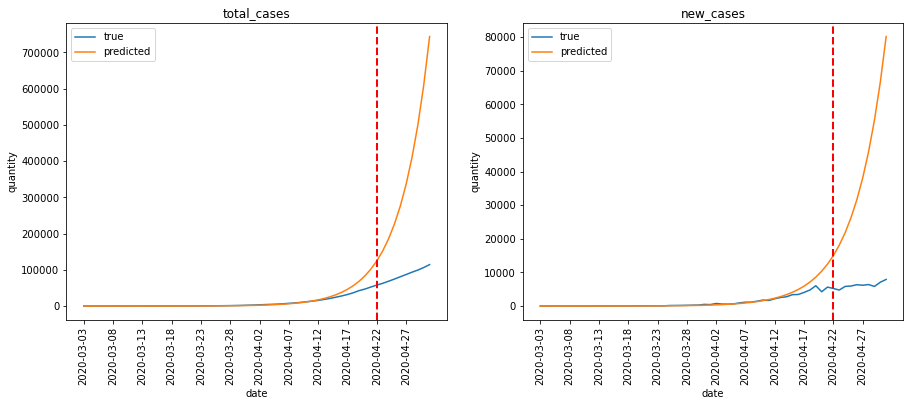

In [14]:
# В обычной шкале

i = 60

fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.set(title = 'total_cases')
ax_2.set(title = 'new_cases')

ax_1.plot(full['date'][:i], full['total_cases'][:i], label='true')
ax_1.plot(full['date'][:i], full['predicted_total_cases'][:i], label='predicted')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

ax_2.plot(full['date'][:i], full['new_cases'][:i], label='true')
ax_2.plot(full['date'][:i], full['predicted_new_cases'][:i], label='predicted')
ax_2.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_2.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_2.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_2.set_xlabel('date')
ax_2.set_ylabel('quantity')
ax_2.legend()

plt.show()

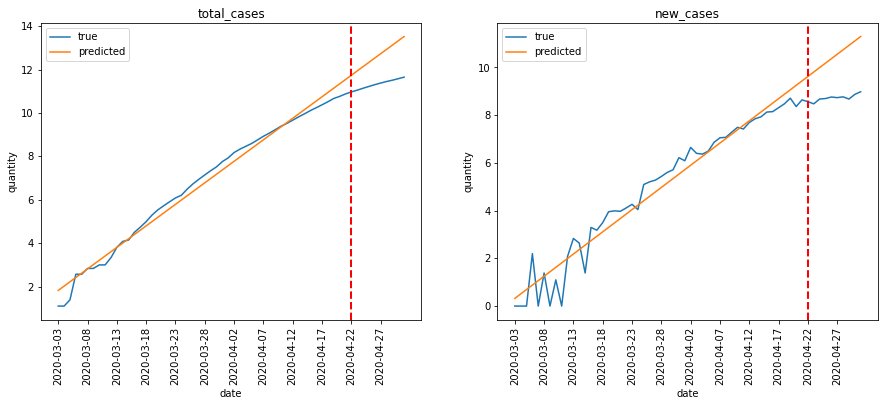

In [15]:
# В логарифмированной шкале
i = 60

fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(2, 2, 1)
ax_2 = fig.add_subplot(2, 2, 2)

ax_1.set(title = 'total_cases')
ax_2.set(title = 'new_cases')

ax_1.plot(full['date'][:i], full['ln_total_cases'][:i], label='true')
ax_1.plot(full['date'][:i], full['ln_predicted_total_cases'][:i], label='predicted')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

ax_2.plot(full['date'][:i], full['ln_new_cases'][:i], label='true')
ax_2.plot(full['date'][:i], full['ln_predicted_new_cases'][:i], label='predicted')
ax_2.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_2.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_2.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_2.set_xlabel('date')
ax_2.set_ylabel('quantity')
ax_2.legend()

plt.show()

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

In [16]:
noise_std_total_cases = np.std(train['ln_total_cases'] - train['ln_predicted_total_cases'])
noise_std_new_cases = np.std(train['ln_new_cases'] - train['ln_predicted_new_cases'])
noise_std_total_cases, noise_std_new_cases

(0.3490422059635658, 0.5960780559466519)

In [17]:
def myplot_heatmap(Z, w):
    # Make the plot
    plt.pcolormesh(X, Y, Z, cmap=plt.cm.jet)
    plt.scatter(w[0], w[1], marker='*', s=120)

In [18]:
def bayesian_update(mu, sigma, x, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

Априорная вероятность


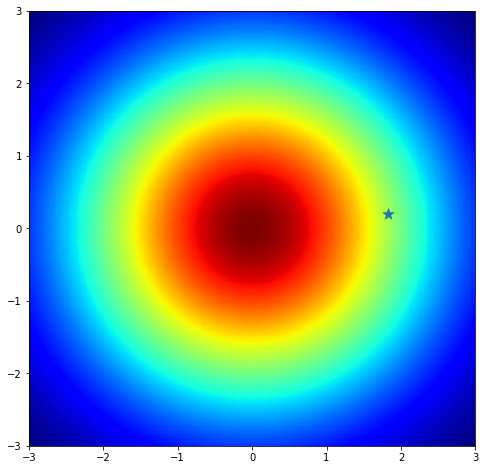

In [19]:
N = 500
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Априорная вероятность
cur_mu, cur_sigma = np.array([0, 0]), 3*np.array([[1, 0], [0, 1]])
Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)
# Отображение априорной вероятности
print('Априорная вероятность')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z, [lr_total_cases.intercept_, lr_total_cases.coef_[0]])
plt.show()

Апостериорная вероятность


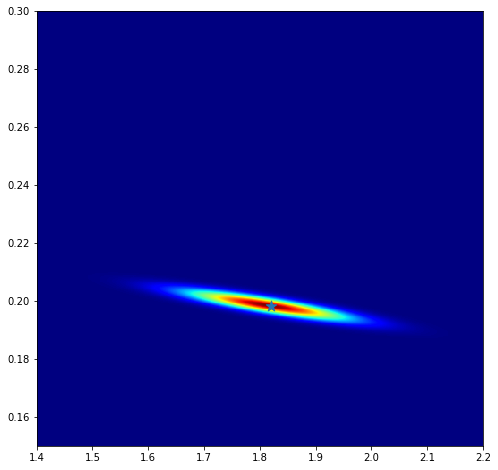

In [20]:
X = np.linspace(1.4, 2.2, N)
Y = np.linspace(0.15, 0.30, N)
X, Y = np.meshgrid(X, Y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y


for i in range(50):
    px, py = float(train[train['date_num']==i]['date_num']), float(train[train['date_num']==i]['ln_total_cases'])
    cur_mu, cur_sigma = bayesian_update(cur_mu, cur_sigma, px, py, sigma_noise=noise_std_total_cases)
    Z = multivariate_normal.pdf(pos, mean=cur_mu, cov=cur_sigma)


print('Апостериорная вероятность')
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
myplot_heatmap(Z, [lr_total_cases.intercept_, lr_total_cases.coef_[0]])
plt.show()

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

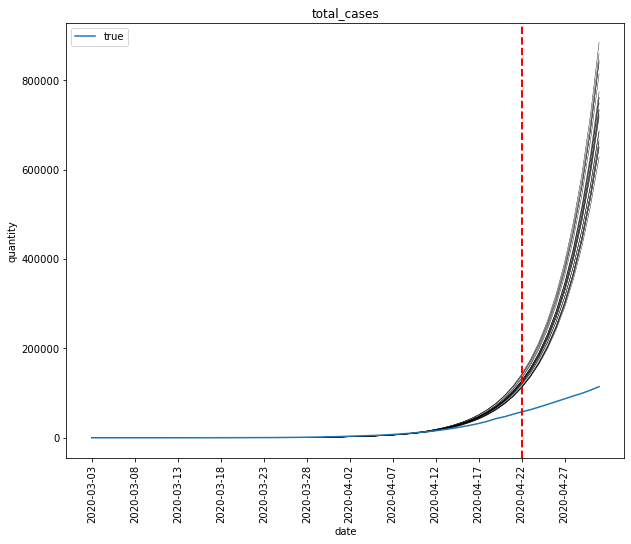

In [21]:
# В обычной шкале

i = 60

fig = plt.figure(figsize=(10, 8))

ax_1 = fig.add_subplot(1, 1, 1)

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20)
for w in my_w:
    ax_1.plot(full['date_num'][:i], np.exp(w[0] + w[1]*np.array(full['date_num']))[:i], 'k-', lw=.4)

ax_1.set(title = 'total_cases')
ax_1.plot(full['date'][:i], full['total_cases'][:i], label='true')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

plt.show()

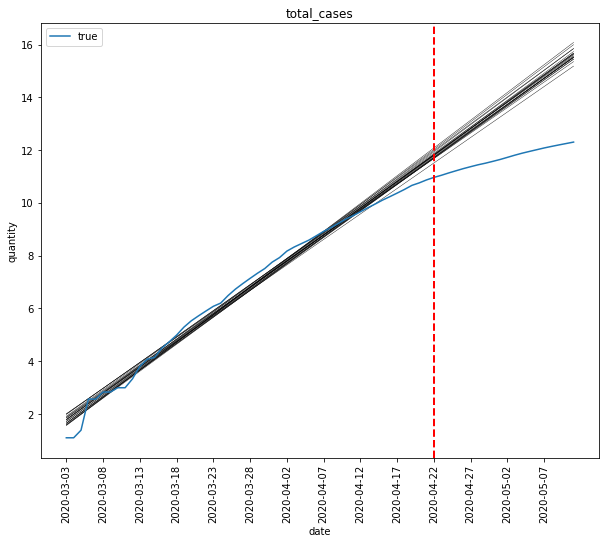

In [22]:
# В логарифмированной шкале

i = 70 

fig = plt.figure(figsize=(10, 8))

ax_1 = fig.add_subplot(1, 1, 1)

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20)
for w in my_w:
    ax_1.plot(full['date_num'][:i], (w[0] + w[1]*np.array(full['date_num']))[:i], 'k-', lw=.4)

ax_1.set(title = 'total_cases')
ax_1.plot(full['date'][:i], full['ln_total_cases'][:i], label='true')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

plt.show()

In [23]:
# Прогнозное значение к 1-му мая

total_cases_may_01_list = []
total_cases_june_01_list = []
total_cases_september_01_list = []

n = 1000
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, n)
for w in my_w:
    total_cases_may_01_list.append(np.exp(w[0] + w[1]*((datetime(2020, 5, 1) - datetime(2020, 3, 3)).days)))
    total_cases_june_01_list.append(np.exp(w[0] + w[1]*((datetime(2020, 6, 1) - datetime(2020, 3, 3)).days)))
    total_cases_september_01_list.append(np.exp(w[0] + w[1]*((datetime(2020, 9, 1) - datetime(2020, 3, 3)).days)))
    


Среднее прогнозное total_cases / реальное значение: 
 2020-05-01 = 751453.0002553682 / 114431
 2020-06-01 = 358252969.99187416 / 414328
 2020-09-01 = 3.40328066453089e+16 / 997072



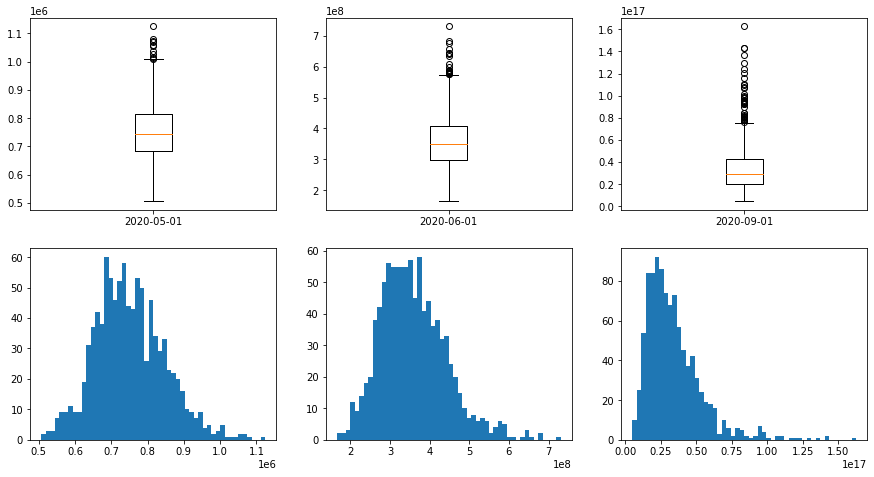

In [24]:
print(f"Среднее прогнозное total_cases / реальное значение: \n \
2020-05-01 = {np.mean(total_cases_may_01_list)} / {int(full[full['date']=='2020-05-01']['total_cases'])}\n \
2020-06-01 = {np.mean(total_cases_june_01_list)} / {int(full[full['date']=='2020-06-01']['total_cases'])}\n \
2020-09-01 = {np.mean(total_cases_september_01_list)} / {int(full[full['date']=='2020-09-01']['total_cases'])}\n")

fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(3, 3, 1)
ax_2 = fig.add_subplot(3, 3, 2)
ax_3 = fig.add_subplot(3, 3, 3)
ax_4 = fig.add_subplot(3, 3, 4)
ax_5 = fig.add_subplot(3, 3, 5)
ax_6 = fig.add_subplot(3, 3, 6)


ax_1.boxplot((total_cases_may_01_list), labels=['2020-05-01'])

ax_2.boxplot((total_cases_june_01_list), labels=['2020-06-01'])

ax_3.boxplot((total_cases_september_01_list), labels=['2020-09-01'])

bins_num = 50

ax_4.hist(total_cases_may_01_list, bins_num)

ax_5.hist(total_cases_june_01_list, bins_num)

ax_6.hist(total_cases_september_01_list, bins_num)

plt.show()

3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

total_cases = функции распределения Гауссиана
 
дифференцируем по дням, получаем:

new_cases = exp(w_0 + w_1 * x + w_2 * x^2), где x - количество дней

берем логарифм, получаем:

ln(new_cases) = w_0 + w_1 * x + w_2 * x^2

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

In [25]:
def bayesian_update_2(mu, sigma, x, y, sigma_noise=0.25):
    x_matrix = np.array([[1, x, x*x]])
    sigma_n = np.linalg.inv(np.linalg.inv(sigma)+ (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), x_matrix) )
    mu_n = np.matmul(sigma_n, np.matmul(np.linalg.inv(sigma), np.transpose(mu)) + (1 / (sigma_noise ** 2)) * np.matmul(np.transpose(x_matrix), np.array([y]) ) )
    return mu_n, sigma_n

In [26]:
# Априорная вероятность
cur_mu, cur_sigma = np.array([0, 0, 0]), 5*np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# Апостериорная вероятность
for i in range(50):
    px, py = float(train[train['date_num']==i]['date_num']), float(train[train['date_num']==i]['ln_new_cases'])
    # в качестве шума пробовал использовать noise_std_new_cases, но тогда прогноз на сентябрь получается нереалистичным, 
    # уменьшал понемногу шум, пока не получил примелемые результаты
    cur_mu, cur_sigma = bayesian_update_2(cur_mu, cur_sigma, px, py, sigma_noise=0.25) 
    
print(f"mu = {cur_mu} \n sigma = {cur_sigma}")

mu = [-0.39572133  0.27555125 -0.00182857] 
 sigma = [[ 1.03742168e-02 -8.38173869e-04  1.41106362e-05]
 [-8.38173869e-04  9.24690487e-05 -1.76513083e-06]
 [ 1.41106362e-05 -1.76513083e-06  3.60315913e-08]]


c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?


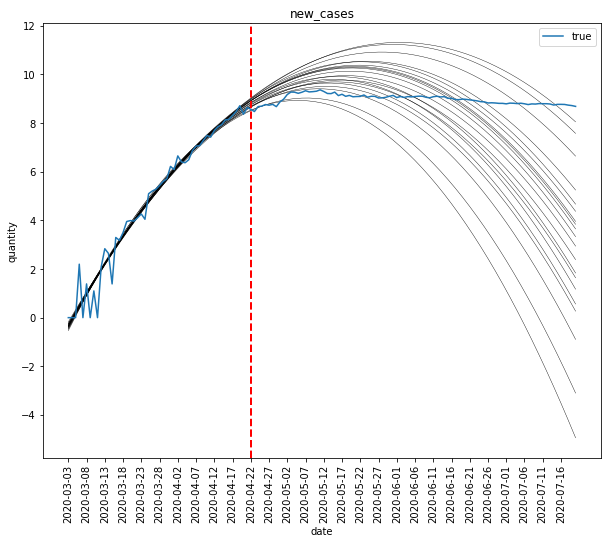

In [27]:
# В логарифмированной шкале:  ln(new_cases)
i = 140

fig = plt.figure(figsize=(10, 8))

ax_1 = fig.add_subplot(1, 1, 1)

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20)
for w in my_w:
    ax_1.plot(full['date_num'][:i], (w[0] + w[1]*np.array(full['date_num']) + w[2]*np.array(full['date_num'])**2)[:i], 'k-', lw=.4)

ax_1.set(title = 'new_cases')
ax_1.plot(full['date'][:i], full['ln_new_cases'][:i], label='true')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

plt.show()

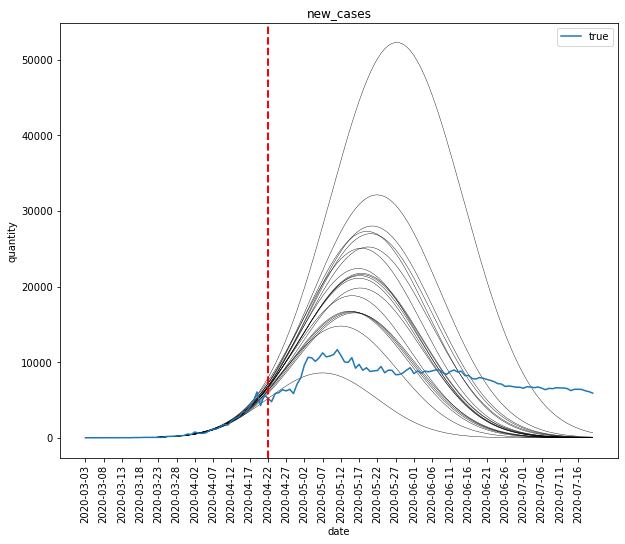

In [28]:
# В обычной шкале: new_cases - производная total_cases
i = 140

fig = plt.figure(figsize=(10, 8))

ax_1 = fig.add_subplot(1, 1, 1)

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20)
for w in my_w:
    ax_1.plot(full['date_num'][:i], np.exp(w[0] + w[1]*np.array(full['date_num']) + w[2]*np.array(full['date_num'])**2)[:i], 'k-', lw=.4)

ax_1.set(title = 'new_cases')
ax_1.plot(full['date'][:i], full['new_cases'][:i], label='true')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

plt.show()

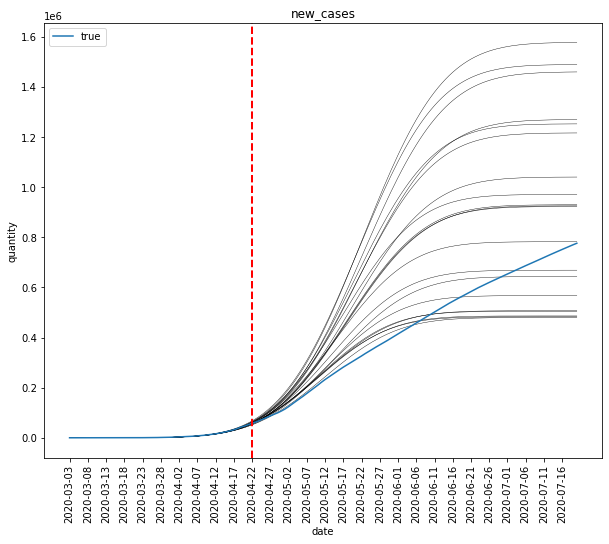

In [29]:
# В обычной шкале: new_cases - производная total_cases
i = 140

fig = plt.figure(figsize=(10, 8))

ax_1 = fig.add_subplot(1, 1, 1)

my_w = np.random.multivariate_normal(cur_mu, cur_sigma, 20)
for w in my_w:
    ax_1.plot(full['date_num'][:i], np.cumsum(np.exp(w[0] + w[1]*np.array(full['date_num']) + w[2]*np.array(full['date_num'])**2))[:i], 'k-', lw=.4)

ax_1.set(title = 'new_cases')
ax_1.plot(full['date'][:i], full['total_cases'][:i], label='true')
ax_1.axvline(x=50, linewidth=2, linestyle = '--', color = 'red')
ax_1.xaxis.set_ticks(list(full['date'][:i])[::5])
ax_1.set_xticklabels(list(full['date'][:i])[::5], rotation=90)
ax_1.set_xlabel('date')
ax_1.set_ylabel('quantity')
ax_1.legend()

plt.show()

In [30]:
# Прогнозное значение к 1-му мая

total_cases_may_01_list = []
total_cases_june_01_list = []
total_cases_september_01_list = []

n = 1000
my_w = np.random.multivariate_normal(cur_mu, cur_sigma, n)
for w in my_w:
    x = np.arange((datetime(2020, 5, 1) - datetime(2020, 3, 3)).days)
    total_cases_may_01_list.append(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))[-1])
    x = np.arange((datetime(2020, 6, 1) - datetime(2020, 3, 3)).days)
    total_cases_june_01_list.append(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))[-1])
    x = np.arange((datetime(2020, 9, 1) - datetime(2020, 3, 3)).days)
    total_cases_september_01_list.append(np.cumsum(np.exp(w[0] + w[1]*x + w[2]*x**2))[-1])

Среднее прогнозное total_cases / реальное значение: 
 2020-05-01 = 139627.11926165968 / 114431
 2020-06-01 = 795153.7179421498 / 414328
 2020-09-01 = 1115197.4503223742 / 997072

Пессимистичный прогноз total_cases / реальное значение: 
 2020-05-01 = 161652.6892160594 / 114431
 2020-06-01 = 1244927.981117512 / 414328
 2020-09-01 = 1940259.4164083493 / 997072

Оптимистичный прогноз total_cases / реальное значение: 
 2020-05-01 = 119549.70207046611 / 114431
 2020-06-01 = 451054.8378336652 / 414328
 2020-09-01 = 493370.4604770279 / 997072



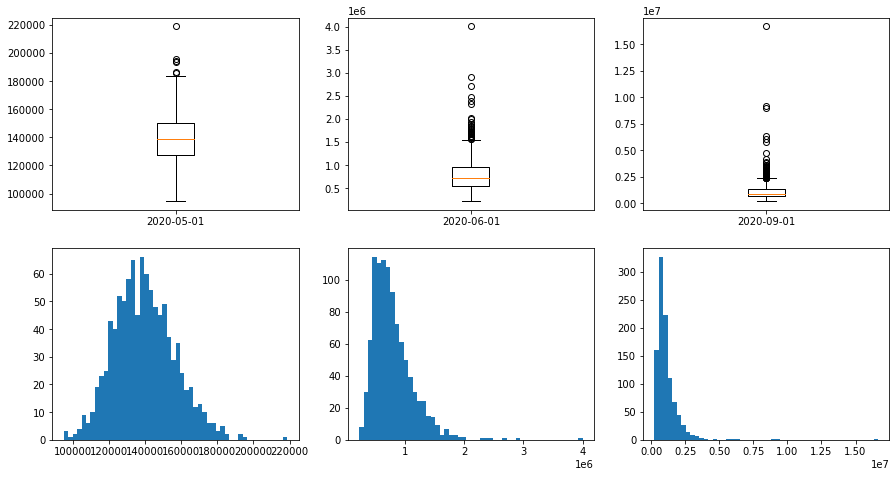

In [31]:
print(f"Среднее прогнозное total_cases / реальное значение: \n \
2020-05-01 = {np.mean(total_cases_may_01_list)} / {int(full[full['date']=='2020-05-01']['total_cases'])}\n \
2020-06-01 = {np.mean(total_cases_june_01_list)} / {int(full[full['date']=='2020-06-01']['total_cases'])}\n \
2020-09-01 = {np.mean(total_cases_september_01_list)} / {int(full[full['date']=='2020-09-01']['total_cases'])}\n")

print(f"Пессимистичный прогноз total_cases / реальное значение: \n \
2020-05-01 = {np.percentile(total_cases_may_01_list, 90)} / {int(full[full['date']=='2020-05-01']['total_cases'])}\n \
2020-06-01 = {np.percentile(total_cases_june_01_list, 90)} / {int(full[full['date']=='2020-06-01']['total_cases'])}\n \
2020-09-01 = {np.percentile(total_cases_september_01_list, 90)} / {int(full[full['date']=='2020-09-01']['total_cases'])}\n")

print(f"Оптимистичный прогноз total_cases / реальное значение: \n \
2020-05-01 = {np.percentile(total_cases_may_01_list, 10)} / {int(full[full['date']=='2020-05-01']['total_cases'])}\n \
2020-06-01 = {np.percentile(total_cases_june_01_list, 10)} / {int(full[full['date']=='2020-06-01']['total_cases'])}\n \
2020-09-01 = {np.percentile(total_cases_september_01_list, 10)} / {int(full[full['date']=='2020-09-01']['total_cases'])}\n")


fig = plt.figure(figsize=(15, 12))

ax_1 = fig.add_subplot(3, 3, 1)
ax_2 = fig.add_subplot(3, 3, 2)
ax_3 = fig.add_subplot(3, 3, 3)
ax_4 = fig.add_subplot(3, 3, 4)
ax_5 = fig.add_subplot(3, 3, 5)
ax_6 = fig.add_subplot(3, 3, 6)


ax_1.boxplot((total_cases_may_01_list), labels=['2020-05-01'])

ax_2.boxplot((total_cases_june_01_list), labels=['2020-06-01'])

ax_3.boxplot((total_cases_september_01_list), labels=['2020-09-01'])

bins_num = 50

ax_4.hist(total_cases_may_01_list, bins_num)

ax_5.hist(total_cases_june_01_list, bins_num)

ax_6.hist(total_cases_september_01_list, bins_num)

plt.show()